(102, 2)


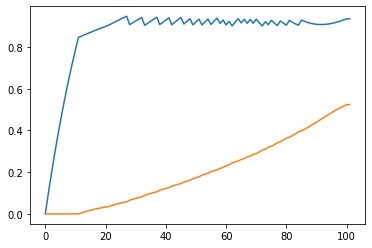

In [ ]:
import autograd.numpy as np
from autograd import grad
#import numpy as np
import matplotlib.pyplot as plt

def J(g,tlims):
  ''' run a simulation of a dynamic system and collect the sum of the
  squared errors between the simulated output and the desired output.
  The controller depends on the parameter g, and tlims sets the initial
  and final simulated times for each run.
  '''
  
  N = 10; # Save for later use
  desired = 1.0;
  tinit = tlims[0]
  tfinal = tlims[1]
  x = [0.0,0.0]
  output,time = simulate(sys,[tinit,tfinal],x,g)
  sum = np.sum((desired - output[:,0])**2)/len(output[:,0])
  return sum

def sys(t,x,g):
  ref = 1.0
  d = [0.0,0.0]
  C = 0.5
  error = ref-x[0]
  #print(g)
  if np.abs(error) > np.abs(ref/10.0):
    input = g*np.sign(error)
    integrate = 0.0
  else:
    input = x[1]
    integrate = 1.0
  d[0] = -C*x[0]+input
  d[1] = error*g*integrate
  return d

def simulate(fun,trange,x,g):
  t = trange[0]
  h = 0.1
  vx = np.array(x)
  vt = np.zeros((1,))
  while t<trange[1]:
    dt = trange[1]-t
    if dt<h:
      h = dt
    k1 = fun(t,x,g)
    k2 = fun(t+h,[x[i]+k1[i]*h for i in range(len(x))],g)
    x = [x[i] + h/2.0*(k1[i]+k2[i]) for i in range(len(x))]
    vx = np.vstack((vx,np.array(x)))
    t = t + h
    vt = np.vstack((vt,np.array(t)))
  return vx,vt

x = [0.0,0.0]
output,time = simulate(sys,np.array([0.0,10.0]),x,1.0)
print(output.shape)
plt.plot(output)

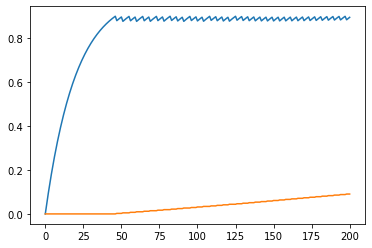

-0.4403430331516498
1.9688864710514464
-0.005104701315884761


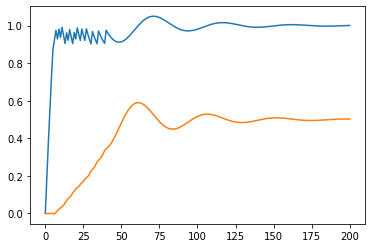

In [ ]:
grad_J=grad(J,0)
g = 0.5
tin = 0.0
tout = 20.0
output,time = simulate(sys,np.array([tin,tout]),x,g)
plt.plot(output)
plt.draw()
plt.pause(0.01)
print(grad_J(g,[tin,tout]))
iter = 0
maxIter = 200
minGrad = 1e-6
alpha = 0.5
c = True
while c:
  dJdg = grad_J(g,[tin,tout])
  g = g - alpha*dJdg
  iter +=1
  c = iter < maxIter and abs(dJdg) > minGrad
print(g)
print(grad_J(g,[tin,tout]))
output,time = simulate(sys,np.array([tin,tout]),x,g)
plt.figure()
plt.plot(output)